In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing necessary libraries and datasets

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file=pd.read_csv("/content/drive/MyDrive/Datasets/train.csv")
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Cleaning

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
file.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
file.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#**Interpretation**
**This shows there are multiple null values which always hinders the analysis process**

**It is always necessary to handle those data in order to get better results**

#Renaming columns

In [ ]:
new_column={"Pclass":"Ticket Class","SibSp":"Siblings per Parents","Parch":"Parents per children","Ticket":"Ticket Number","Embarked":"Onboarding Station"}
file=file.rename(columns=new_column)


#**Interpretation**
**This renaming of columns helps the user or the practitioner a better understanding of dataset**

In [ ]:
file["Age"]=np.ceil(file["Age"])

<ipython-input-54-a5b98b2be741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file["Age"]=np.ceil(file["Age"])


#**Interpretation**
**Age is rounded of to avoid decimal values in this feature, as the age can be well analysed when it is a distinct digit**

In [ ]:
file.dtypes

PassengerId               int64
Survived                  int64
Ticket Class              int64
Name                     object
Sex                      object
Age                     float64
Siblings per Parents      int64
Parents per children      int64
Ticket Number            object
Fare                    float64
Cabin                    object
Onboarding Station       object
dtype: object

#Removing Null Values

In [ ]:
file.isna().sum()

PassengerId               0
Survived                  0
Ticket Class              0
Name                      0
Sex                       0
Age                     177
Siblings per Parents      0
Parents per children      0
Ticket Number             0
Fare                      0
Cabin                   687
Onboarding Station        2
dtype: int64

In [ ]:
file=file.dropna()

In [ ]:
file.isna().sum()

PassengerId             0
Survived                0
Ticket Class            0
Name                    0
Sex                     0
Age                     0
Siblings per Parents    0
Parents per children    0
Ticket Number           0
Fare                    0
Cabin                   0
Onboarding Station      0
dtype: int64

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           183 non-null    int64  
 1   Survived              183 non-null    int64  
 2   Ticket Class          183 non-null    int64  
 3   Name                  183 non-null    object 
 4   Sex                   183 non-null    object 
 5   Age                   183 non-null    float64
 6   Siblings per Parents  183 non-null    int64  
 7   Parents per children  183 non-null    int64  
 8   Ticket Number         183 non-null    object 
 9   Fare                  183 non-null    float64
 10  Cabin                 183 non-null    object 
 11  Onboarding Station    183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


#Grouping datasets based on some criteria for better understanding of the data

In [ ]:
survived_data=file[file["Survived"]==1]
not_survived_data=file[file["Survived"]==0]

In [ ]:
gender_pivot=file.pivot_table(index="Sex",values="Survived",aggfunc=np.sum)
gender_pivot

,Survived
Sex,
female,82
male,41


In [ ]:
onboarding_pivot=file.pivot_table(values="Fare",index="Onboarding Station",aggfunc=np.mean)
onboarding_pivot

,Fare
Onboarding Station,
C,103.342503
Q,90.000000
S,64.669216


In [ ]:
demographic_pivot=file.pivot_table(index="Sex",values=["Siblings per Parents","Parents per children"],aggfunc=np.mean)
demographic_pivot

,Parents per children,Siblings per Parents
Sex,,
female,0.545455,0.534091
male,0.410526,0.400000


#**Interpretation**
**Above are the three pivot tables for different category of datas which helps in understanding different group of data individually**

**1) Gender pivot gives information the number of passengers that are survived based on genders**

**2) Onboarding pivot gives information about the fare price while onboarding from different stations,C=Cherbourg,Q=Queenstown,S=Southampton**

**3) Demographic pivot gives another piece of information based on passenger and gender**

In [ ]:
gender_group=file.groupby("Sex")
onboarding_station_group=file.groupby("Onboarding Station")
survived_group=file.groupby("Survived")

In [ ]:
onboarding_station_group

**C=Cherbourg**

**Q=Queenstown**

**S=Southampton**


In [ ]:
survived_group.size()

Survived
0     60
1    123
dtype: int64

**0=Not survived**

**1=Survived**

In [ ]:
gender_group.size()

Sex
female    88
male      95
dtype: int64

In [ ]:
categorical_data=file.select_dtypes(include=["object"])
numeric_data=file.select_dtypes(include=["int"])

In [ ]:
file.describe()

,PassengerId,Survived,Ticket Class,Age,Siblings per Parents,Parents per children,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.683060,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.644333,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


#Outliers Detection

In [ ]:
q1=file["Fare"].quantile(0.25)
q3=file["Fare"].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
file=file[(file["Fare"]<ub) & (file["Fare"]>lb)]

#**Interpretation**
**This is one of the most important step in Exploratory data analysis**

**It helps in handling those data that lies far away from the distribution**

**It affects the overall daa analysis badly and it is to be needed very carefully using Inter Quartile Range**

#Data Visualisation

<Axes: xlabel='Fare', ylabel='Count'>

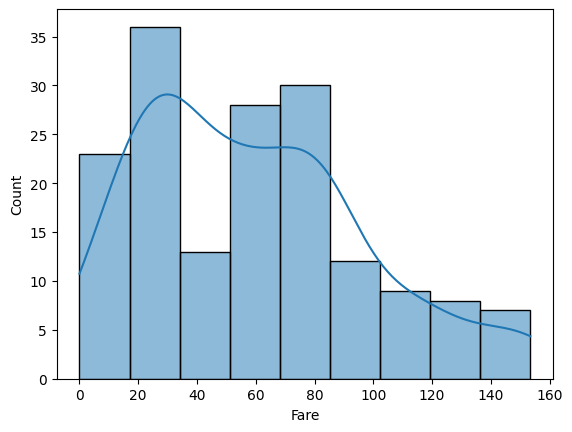

In [ ]:
sns.histplot(file["Fare"],kde=True)

#**Interpretation**
**This shoes the distribution of Fare price**

**This shows that Fare price is normally distributed which is only possible once it is within a certain range and outliers are handled well**

<Axes: >

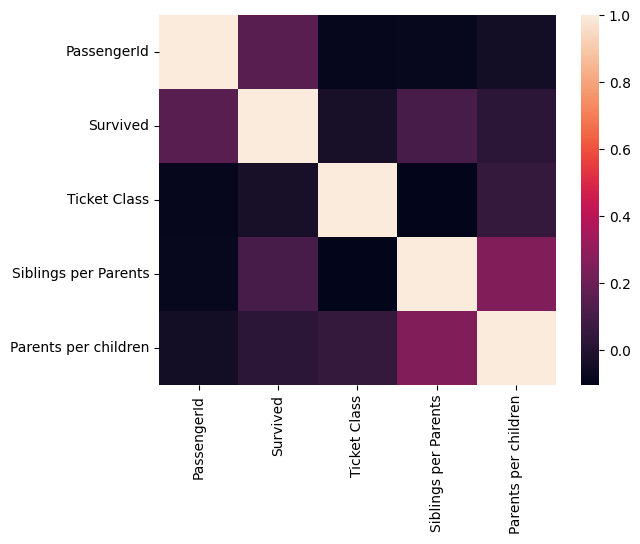

In [ ]:
sns.heatmap(data=numeric_data.corr())

#**Interpretation**
**This heatmap shows the extent of dependency between any two variables**

**Darker the color in the heatmap,more is the dependency**

<Axes: xlabel='Sex', ylabel='Fare'>

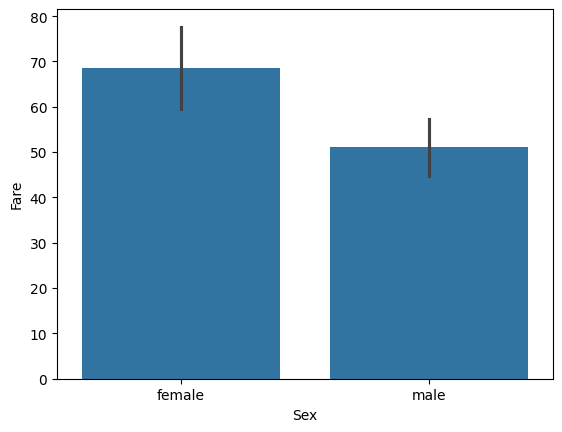

In [ ]:
sns.barplot(x=file["Sex"],y=file["Fare"],estimator=np.mean)

<Axes: xlabel='Onboarding Station', ylabel='count'>

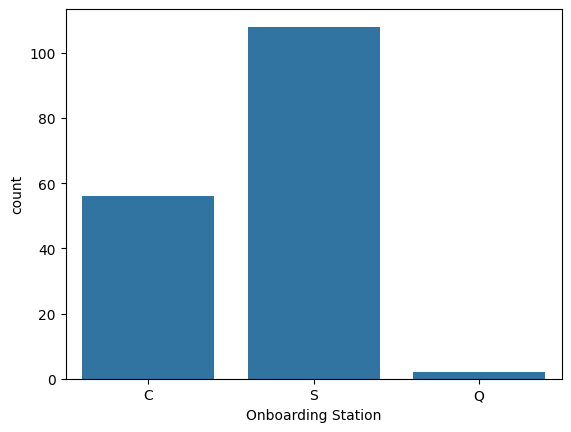

In [ ]:
sns.countplot(x=file["Onboarding Station"])

<Axes: xlabel='Onboarding Station', ylabel='Parents per children'>

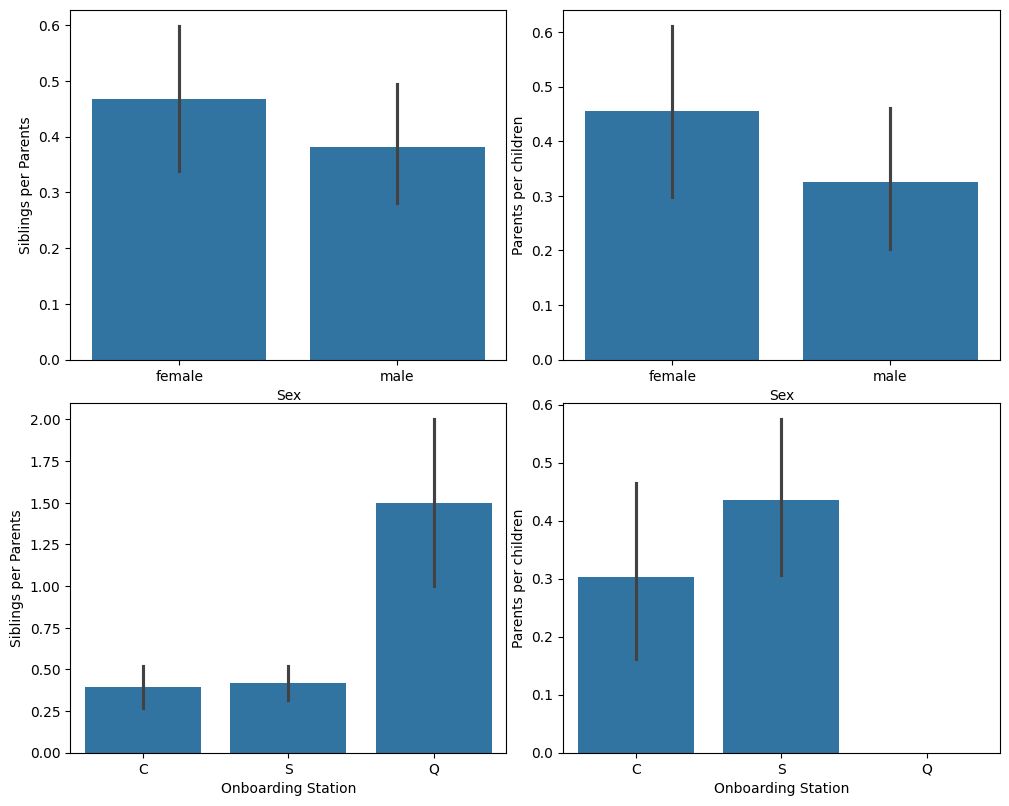

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=1)
sns.barplot(x=file["Sex"],y=file["Siblings per Parents"],estimator=np.mean,ax=axes[0,0])
sns.barplot(x=file["Sex"],y=file["Parents per children"],estimator=np.mean,ax=axes[0,1])
sns.barplot(x=file["Onboarding Station"],y=file["Siblings per Parents"],estimator=np.mean,ax=axes[1,0])
sns.barplot(x=file["Onboarding Station"],y=file["Parents per children"],estimator=np.mean,ax=axes[1,1])

#**Interpretation**
**Average Number of Siblings per Parents by Sex**

The bar plot illustrates the average number of siblings per parents categorized by the gender of the passengers.
It provides insight into the familial structure, highlighting potential gender-based differences in family size.

**Average Number of Parents per Children by Sex**

This bar plot showcases the average number of parents per children, again categorized by gender.
It helps in understanding the parental structure and how it might vary between male and female passengers

**Average Fare Based on Gender**

This plot shows the average fare paid by male and female passengers.
It provides financial insights, revealing any potential differences in the fares paid by passengers of different genders.

**Number of Passengers at Each Onboarding Station**

This plot illustrates the number of passengers boarding from each station.
It helps in understanding the distribution of passengers across different stations, providing insights into the popularity or usage of each station.